# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.environ['MLP_DATA_DIR']="../data"

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def slugify(value):
    """
    Normalizes string, converts to lowercase, removes non-alpha characters,
    and converts spaces to hyphens.
    """
    import re
    value = re.sub(r'[^\w\s/\\.-]', '', value).strip().lower()
    value = re.sub(r'[-\s/\\]+', '-', value)
    return value


def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title="Plot", early_stopping=False):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, early_stopping=early_stopping)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    fig_1.tight_layout()
    fig_1.savefig('figs/' + slugify(title) + "_error.pdf")

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    fig_2.tight_layout()
    fig_2.savefig('figs/' + slugify(title) + "_acc.pdf")
    print(optimiser.eval_monitors(test_data, "(test)"))
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [49]:
def train_model_and_plot_stats2(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title="Plot", early_stopping=False):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = ScheduledOptimiser(
        scheduler, model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, early_stopping=early_stopping)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    fig_1.tight_layout()
    fig_1.savefig('figs/' + slugify(title) + "_error.pdf")

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    fig_2.tight_layout()
    fig_2.savefig('figs/' + slugify(title) + "_acc.pdf")
    print(optimiser.eval_monitors(test_data, "(test)"))
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']
['inputs', 'targets']


GradientDescentLearningRule num_epochs=100, lr=0.05, n_hidden=2


Epoch 5: 2.3s to complete
    error(train)=6.55e-01, acc(train)=8.00e-01, error(valid)=6.86e-01, acc(valid)=7.91e-01
Epoch 10: 2.3s to complete
    error(train)=5.03e-01, acc(train)=8.39e-01, error(valid)=5.63e-01, acc(valid)=8.21e-01
Epoch 15: 2.3s to complete
    error(train)=4.42e-01, acc(train)=8.52e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01
Epoch 20: 2.3s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01
Epoch 25: 2.3s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01
Epoch 30: 2.3s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01
Epoch 35: 2.4s to complete
    error(train)=3.32e-01, acc(train)=8.82e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01
Epoch 40: 2.4s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=4.97e-01, acc(valid)=8.42e-01
Epoch 45: 2.4s to complete
    error(train)=2.94e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.05, n_hidden=2
OrderedDict([('error(test)', 0.68622553987891999), ('acc(test)', 0.82101265822784775)])
GradientDescentLearningRule num_epochs=100, lr=0.1, n_hidden=2


Epoch 5: 2.3s to complete
    error(train)=5.26e-01, acc(train)=8.28e-01, error(valid)=5.77e-01, acc(valid)=8.14e-01
Epoch 10: 2.3s to complete
    error(train)=4.26e-01, acc(train)=8.49e-01, error(valid)=5.12e-01, acc(valid)=8.22e-01
Epoch 15: 2.3s to complete
    error(train)=3.74e-01, acc(train)=8.70e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01
Epoch 20: 2.3s to complete
    error(train)=3.45e-01, acc(train)=8.77e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01
Epoch 25: 2.4s to complete
    error(train)=3.12e-01, acc(train)=8.88e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01
Epoch 30: 2.3s to complete
    error(train)=2.91e-01, acc(train)=8.93e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01
Epoch 35: 2.5s to complete
    error(train)=2.71e-01, acc(train)=8.99e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01
Epoch 40: 2.4s to complete
    error(train)=2.62e-01, acc(train)=9.00e-01, error(valid)=5.45e-01, acc(valid)=8.30e-01
Epoch 45: 2.3s to complete
    error(train)=2.38e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.1, n_hidden=2
OrderedDict([('error(test)', 0.92870593228881182), ('acc(test)', 0.81360759493670876)])
GradientDescentLearningRule num_epochs=100, lr=0.5, n_hidden=2


Epoch 5: 2.6s to complete
    error(train)=4.70e-01, acc(train)=8.36e-01, error(valid)=5.79e-01, acc(valid)=8.11e-01
Epoch 10: 2.9s to complete
    error(train)=4.09e-01, acc(train)=8.53e-01, error(valid)=5.74e-01, acc(valid)=8.17e-01
Epoch 15: 2.7s to complete
    error(train)=3.82e-01, acc(train)=8.56e-01, error(valid)=6.00e-01, acc(valid)=8.15e-01
Epoch 20: 3.6s to complete
    error(train)=3.96e-01, acc(train)=8.56e-01, error(valid)=6.75e-01, acc(valid)=8.02e-01
Epoch 25: 2.3s to complete
    error(train)=3.46e-01, acc(train)=8.71e-01, error(valid)=6.79e-01, acc(valid)=8.11e-01
Epoch 30: 2.6s to complete
    error(train)=3.70e-01, acc(train)=8.65e-01, error(valid)=7.21e-01, acc(valid)=8.06e-01
Epoch 35: 2.4s to complete
    error(train)=3.63e-01, acc(train)=8.67e-01, error(valid)=7.67e-01, acc(valid)=8.04e-01
Epoch 40: 2.5s to complete
    error(train)=3.44e-01, acc(train)=8.74e-01, error(valid)=7.75e-01, acc(valid)=8.09e-01
Epoch 45: 2.9s to complete
    error(train)=3.31e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.5, n_hidden=2
OrderedDict([('error(test)', 1.1416095583286316), ('acc(test)', 0.79189873417721501)])
GradientDescentLearningRule num_epochs=100, lr=1, n_hidden=2


Epoch 5: 2.9s to complete
    error(train)=6.54e-01, acc(train)=7.82e-01, error(valid)=7.72e-01, acc(valid)=7.59e-01
Epoch 10: 2.5s to complete
    error(train)=5.88e-01, acc(train)=8.05e-01, error(valid)=7.51e-01, acc(valid)=7.79e-01
Epoch 15: 2.4s to complete
    error(train)=5.65e-01, acc(train)=8.07e-01, error(valid)=7.62e-01, acc(valid)=7.76e-01
Epoch 20: 2.4s to complete
    error(train)=5.32e-01, acc(train)=8.20e-01, error(valid)=7.63e-01, acc(valid)=7.86e-01
Epoch 25: 3.0s to complete
    error(train)=4.98e-01, acc(train)=8.28e-01, error(valid)=7.62e-01, acc(valid)=7.87e-01
Epoch 30: 2.6s to complete
    error(train)=4.91e-01, acc(train)=8.36e-01, error(valid)=7.68e-01, acc(valid)=7.91e-01
Epoch 35: 2.3s to complete
    error(train)=4.79e-01, acc(train)=8.38e-01, error(valid)=7.66e-01, acc(valid)=7.95e-01
Epoch 40: 2.7s to complete
    error(train)=5.54e-01, acc(train)=8.19e-01, error(valid)=8.96e-01, acc(valid)=7.72e-01
Epoch 45: 2.5s to complete
    error(train)=4.91e-01, acc


GradientDescentLearningRule num_epochs=100, lr=1, n_hidden=2
OrderedDict([('error(test)', 1.0621658924440525), ('acc(test)', 0.77892405063291137)])
GradientDescentLearningRule num_epochs=100, lr=0.05, n_hidden=3


Epoch 5: 2.7s to complete
    error(train)=5.93e-01, acc(train)=8.08e-01, error(valid)=6.34e-01, acc(valid)=7.96e-01
Epoch 10: 2.8s to complete
    error(train)=4.69e-01, acc(train)=8.41e-01, error(valid)=5.45e-01, acc(valid)=8.20e-01
Epoch 15: 3.2s to complete
    error(train)=4.03e-01, acc(train)=8.60e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01
Epoch 20: 2.8s to complete
    error(train)=3.47e-01, acc(train)=8.76e-01, error(valid)=4.83e-01, acc(valid)=8.42e-01
Epoch 25: 3.0s to complete
    error(train)=3.20e-01, acc(train)=8.85e-01, error(valid)=4.83e-01, acc(valid)=8.39e-01
Epoch 30: 3.3s to complete
    error(train)=3.10e-01, acc(train)=8.88e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01
Epoch 35: 2.7s to complete
    error(train)=2.81e-01, acc(train)=8.96e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01
Epoch 40: 2.8s to complete
    error(train)=2.64e-01, acc(train)=9.01e-01, error(valid)=5.15e-01, acc(valid)=8.40e-01
Epoch 45: 2.9s to complete
    error(train)=2.55e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.05, n_hidden=3
OrderedDict([('error(test)', 0.87222566632860177), ('acc(test)', 0.81278481012658199)])
GradientDescentLearningRule num_epochs=100, lr=0.1, n_hidden=3


Epoch 5: 2.8s to complete
    error(train)=4.92e-01, acc(train)=8.36e-01, error(valid)=5.56e-01, acc(valid)=8.16e-01
Epoch 10: 2.7s to complete
    error(train)=4.08e-01, acc(train)=8.56e-01, error(valid)=5.18e-01, acc(valid)=8.27e-01
Epoch 15: 2.8s to complete
    error(train)=3.53e-01, acc(train)=8.73e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01
Epoch 20: 2.8s to complete
    error(train)=3.17e-01, acc(train)=8.83e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01
Epoch 25: 3.0s to complete
    error(train)=3.03e-01, acc(train)=8.86e-01, error(valid)=5.48e-01, acc(valid)=8.28e-01
Epoch 30: 2.9s to complete
    error(train)=2.55e-01, acc(train)=9.02e-01, error(valid)=5.36e-01, acc(valid)=8.38e-01
Epoch 35: 3.0s to complete
    error(train)=2.56e-01, acc(train)=9.00e-01, error(valid)=5.88e-01, acc(valid)=8.30e-01
Epoch 40: 3.0s to complete
    error(train)=2.34e-01, acc(train)=9.07e-01, error(valid)=6.06e-01, acc(valid)=8.28e-01
Epoch 45: 2.7s to complete
    error(train)=2.26e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.1, n_hidden=3
OrderedDict([('error(test)', 1.0437377642597438), ('acc(test)', 0.80772151898734157)])
GradientDescentLearningRule num_epochs=100, lr=0.5, n_hidden=3


Epoch 5: 2.9s to complete
    error(train)=5.07e-01, acc(train)=8.23e-01, error(valid)=6.11e-01, acc(valid)=8.00e-01
Epoch 10: 3.0s to complete
    error(train)=4.13e-01, acc(train)=8.50e-01, error(valid)=5.77e-01, acc(valid)=8.14e-01
Epoch 15: 3.2s to complete
    error(train)=3.92e-01, acc(train)=8.58e-01, error(valid)=5.86e-01, acc(valid)=8.20e-01
Epoch 20: 6.1s to complete
    error(train)=3.57e-01, acc(train)=8.68e-01, error(valid)=5.99e-01, acc(valid)=8.22e-01
Epoch 25: 3.2s to complete
    error(train)=3.86e-01, acc(train)=8.61e-01, error(valid)=6.55e-01, acc(valid)=8.14e-01
Epoch 30: 3.2s to complete
    error(train)=3.67e-01, acc(train)=8.65e-01, error(valid)=6.61e-01, acc(valid)=8.13e-01
Epoch 35: 3.4s to complete
    error(train)=3.71e-01, acc(train)=8.66e-01, error(valid)=7.31e-01, acc(valid)=8.11e-01
Epoch 40: 3.0s to complete
    error(train)=3.43e-01, acc(train)=8.73e-01, error(valid)=6.88e-01, acc(valid)=8.14e-01
Epoch 45: 3.4s to complete
    error(train)=3.78e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.5, n_hidden=3
OrderedDict([('error(test)', 1.0193656762413805), ('acc(test)', 0.78905063291139266)])
GradientDescentLearningRule num_epochs=100, lr=1, n_hidden=3


Epoch 5: 2.8s to complete
    error(train)=7.74e-01, acc(train)=7.62e-01, error(valid)=8.68e-01, acc(valid)=7.44e-01
Epoch 10: 3.2s to complete
    error(train)=6.85e-01, acc(train)=7.80e-01, error(valid)=7.99e-01, acc(valid)=7.61e-01
Epoch 15: 2.7s to complete
    error(train)=7.32e-01, acc(train)=7.76e-01, error(valid)=8.77e-01, acc(valid)=7.55e-01
Epoch 20: 2.7s to complete
    error(train)=6.67e-01, acc(train)=7.95e-01, error(valid)=8.24e-01, acc(valid)=7.69e-01
Epoch 25: 3.1s to complete
    error(train)=6.17e-01, acc(train)=8.01e-01, error(valid)=8.01e-01, acc(valid)=7.72e-01
Epoch 30: 2.9s to complete
    error(train)=6.23e-01, acc(train)=7.97e-01, error(valid)=8.27e-01, acc(valid)=7.70e-01
Epoch 35: 2.7s to complete
    error(train)=7.00e-01, acc(train)=7.84e-01, error(valid)=8.79e-01, acc(valid)=7.57e-01
Epoch 40: 3.2s to complete
    error(train)=6.17e-01, acc(train)=8.06e-01, error(valid)=8.33e-01, acc(valid)=7.72e-01
Epoch 45: 3.5s to complete
    error(train)=6.05e-01, acc


GradientDescentLearningRule num_epochs=100, lr=1, n_hidden=3
OrderedDict([('error(test)', 3.8528605654676795), ('acc(test)', 0.021772151898734143)])
GradientDescentLearningRule num_epochs=100, lr=0.05, n_hidden=4


Epoch 5: 3.1s to complete
    error(train)=5.99e-01, acc(train)=8.03e-01, error(valid)=6.46e-01, acc(valid)=7.91e-01
Epoch 10: 3.1s to complete
    error(train)=4.38e-01, acc(train)=8.50e-01, error(valid)=5.27e-01, acc(valid)=8.26e-01
Epoch 15: 3.1s to complete
    error(train)=3.84e-01, acc(train)=8.64e-01, error(valid)=5.09e-01, acc(valid)=8.27e-01
Epoch 20: 3.0s to complete
    error(train)=3.50e-01, acc(train)=8.74e-01, error(valid)=5.03e-01, acc(valid)=8.31e-01
Epoch 25: 3.1s to complete
    error(train)=3.11e-01, acc(train)=8.87e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01
Epoch 30: 3.6s to complete
    error(train)=2.95e-01, acc(train)=8.89e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01
Epoch 35: 3.5s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=5.18e-01, acc(valid)=8.38e-01
Epoch 40: 3.2s to complete
    error(train)=2.51e-01, acc(train)=9.02e-01, error(valid)=5.42e-01, acc(valid)=8.33e-01
Epoch 45: 4.2s to complete
    error(train)=2.25e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.05, n_hidden=4
OrderedDict([('error(test)', 0.96409402371464914), ('acc(test)', 0.81417721518987318)])
GradientDescentLearningRule num_epochs=100, lr=0.1, n_hidden=4


Epoch 5: 3.1s to complete
    error(train)=4.89e-01, acc(train)=8.33e-01, error(valid)=5.57e-01, acc(valid)=8.14e-01
Epoch 10: 3.5s to complete
    error(train)=3.97e-01, acc(train)=8.58e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01
Epoch 15: 3.1s to complete
    error(train)=3.31e-01, acc(train)=8.77e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01
Epoch 20: 3.4s to complete
    error(train)=2.97e-01, acc(train)=8.88e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01
Epoch 25: 3.8s to complete
    error(train)=2.62e-01, acc(train)=9.00e-01, error(valid)=5.28e-01, acc(valid)=8.39e-01
Epoch 30: 3.3s to complete
    error(train)=2.42e-01, acc(train)=9.04e-01, error(valid)=5.65e-01, acc(valid)=8.35e-01
Epoch 35: 3.5s to complete
    error(train)=2.31e-01, acc(train)=9.08e-01, error(valid)=6.14e-01, acc(valid)=8.34e-01
Epoch 40: 3.4s to complete
    error(train)=2.10e-01, acc(train)=9.16e-01, error(valid)=6.22e-01, acc(valid)=8.34e-01
Epoch 45: 3.2s to complete
    error(train)=2.13e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.1, n_hidden=4
OrderedDict([('error(test)', 1.0572535186239427), ('acc(test)', 0.80740506329113892)])
GradientDescentLearningRule num_epochs=100, lr=0.5, n_hidden=4


Epoch 5: 3.3s to complete
    error(train)=5.39e-01, acc(train)=8.18e-01, error(valid)=6.32e-01, acc(valid)=7.99e-01
Epoch 10: 3.1s to complete
    error(train)=4.86e-01, acc(train)=8.35e-01, error(valid)=6.37e-01, acc(valid)=8.02e-01
Epoch 15: 3.0s to complete
    error(train)=4.02e-01, acc(train)=8.57e-01, error(valid)=5.83e-01, acc(valid)=8.21e-01
Epoch 20: 3.1s to complete
    error(train)=3.87e-01, acc(train)=8.63e-01, error(valid)=5.99e-01, acc(valid)=8.23e-01
Epoch 25: 3.0s to complete
    error(train)=4.13e-01, acc(train)=8.50e-01, error(valid)=6.43e-01, acc(valid)=8.10e-01
Epoch 30: 3.0s to complete
    error(train)=3.76e-01, acc(train)=8.65e-01, error(valid)=6.37e-01, acc(valid)=8.20e-01
Epoch 35: 3.1s to complete
    error(train)=4.00e-01, acc(train)=8.62e-01, error(valid)=6.59e-01, acc(valid)=8.15e-01
Epoch 40: 3.2s to complete
    error(train)=4.02e-01, acc(train)=8.53e-01, error(valid)=6.80e-01, acc(valid)=8.07e-01
Epoch 45: 3.4s to complete
    error(train)=4.01e-01, acc

C:\Program Files\Anaconda3\envs\py365\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


GradientDescentLearningRule num_epochs=100, lr=0.5, n_hidden=4
OrderedDict([('error(test)', 0.81696420236444101), ('acc(test)', 0.80436708860759454)])
GradientDescentLearningRule num_epochs=100, lr=1, n_hidden=4


Epoch 5: 3.2s to complete
    error(train)=1.06e+00, acc(train)=6.87e-01, error(valid)=1.13e+00, acc(valid)=6.75e-01
Epoch 10: 3.9s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.09e+00, acc(valid)=6.99e-01
Epoch 15: 3.3s to complete
    error(train)=8.53e-01, acc(train)=7.56e-01, error(valid)=9.71e-01, acc(valid)=7.34e-01
Epoch 20: 3.2s to complete
    error(train)=1.18e+00, acc(train)=6.94e-01, error(valid)=1.30e+00, acc(valid)=6.76e-01
Epoch 25: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02
Epoch 30: 3.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02
Epoch 35: 3.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02
Epoch 40: 3.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02
Epoch 45: 3.5s to complete
    error(train)=3.85e+00, acc


GradientDescentLearningRule num_epochs=100, lr=1, n_hidden=4
OrderedDict([('error(test)', 3.852720967512377), ('acc(test)', 0.022215189873417685)])
GradientDescentLearningRule num_epochs=100, lr=0.05, n_hidden=5


Epoch 5: 3.8s to complete
    error(train)=5.34e-01, acc(train)=8.20e-01, error(valid)=5.85e-01, acc(valid)=8.09e-01
Epoch 10: 3.8s to complete
    error(train)=4.36e-01, acc(train)=8.48e-01, error(valid)=5.34e-01, acc(valid)=8.21e-01
Epoch 15: 3.6s to complete
    error(train)=3.71e-01, acc(train)=8.67e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01
Epoch 20: 3.6s to complete
    error(train)=3.37e-01, acc(train)=8.75e-01, error(valid)=5.20e-01, acc(valid)=8.29e-01
Epoch 25: 3.7s to complete
    error(train)=2.84e-01, acc(train)=8.94e-01, error(valid)=5.00e-01, acc(valid)=8.45e-01
Epoch 30: 3.6s to complete
    error(train)=2.55e-01, acc(train)=9.04e-01, error(valid)=5.03e-01, acc(valid)=8.47e-01
Epoch 35: 3.7s to complete
    error(train)=2.56e-01, acc(train)=9.02e-01, error(valid)=5.51e-01, acc(valid)=8.35e-01
Epoch 40: 3.5s to complete
    error(train)=2.36e-01, acc(train)=9.08e-01, error(valid)=5.68e-01, acc(valid)=8.37e-01
Epoch 45: 3.7s to complete
    error(train)=2.34e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.05, n_hidden=5
OrderedDict([('error(test)', 1.0029917645713315), ('acc(test)', 0.81569620253164532)])
GradientDescentLearningRule num_epochs=100, lr=0.1, n_hidden=5


Epoch 5: 3.4s to complete
    error(train)=4.87e-01, acc(train)=8.34e-01, error(valid)=5.65e-01, acc(valid)=8.17e-01
Epoch 10: 3.4s to complete
    error(train)=3.76e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01
Epoch 15: 3.8s to complete
    error(train)=3.32e-01, acc(train)=8.76e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01
Epoch 20: 3.8s to complete
    error(train)=2.98e-01, acc(train)=8.86e-01, error(valid)=5.22e-01, acc(valid)=8.38e-01
Epoch 25: 3.9s to complete
    error(train)=2.74e-01, acc(train)=8.95e-01, error(valid)=5.50e-01, acc(valid)=8.34e-01
Epoch 30: 4.0s to complete
    error(train)=2.51e-01, acc(train)=9.03e-01, error(valid)=5.63e-01, acc(valid)=8.37e-01
Epoch 35: 4.3s to complete
    error(train)=2.38e-01, acc(train)=9.05e-01, error(valid)=6.13e-01, acc(valid)=8.35e-01
Epoch 40: 3.8s to complete
    error(train)=2.64e-01, acc(train)=8.96e-01, error(valid)=6.77e-01, acc(valid)=8.21e-01
Epoch 45: 3.4s to complete
    error(train)=2.28e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.1, n_hidden=5
OrderedDict([('error(test)', 0.99910542833855054), ('acc(test)', 0.80670886075949333)])
GradientDescentLearningRule num_epochs=100, lr=0.5, n_hidden=5


Epoch 5: 3.4s to complete
    error(train)=5.40e-01, acc(train)=8.19e-01, error(valid)=6.26e-01, acc(valid)=7.97e-01
Epoch 10: 3.4s to complete
    error(train)=5.04e-01, acc(train)=8.29e-01, error(valid)=6.33e-01, acc(valid)=8.01e-01
Epoch 15: 3.4s to complete
    error(train)=4.63e-01, acc(train)=8.44e-01, error(valid)=6.30e-01, acc(valid)=8.10e-01
Epoch 20: 3.4s to complete
    error(train)=4.38e-01, acc(train)=8.43e-01, error(valid)=6.14e-01, acc(valid)=8.10e-01
Epoch 25: 3.3s to complete
    error(train)=4.23e-01, acc(train)=8.52e-01, error(valid)=6.24e-01, acc(valid)=8.13e-01
Epoch 30: 3.6s to complete
    error(train)=4.05e-01, acc(train)=8.55e-01, error(valid)=6.40e-01, acc(valid)=8.14e-01
Epoch 35: 3.3s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=6.56e-01, acc(valid)=8.17e-01
Epoch 40: 3.3s to complete
    error(train)=4.08e-01, acc(train)=8.62e-01, error(valid)=6.62e-01, acc(valid)=8.14e-01
Epoch 45: 3.3s to complete
    error(train)=4.10e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.5, n_hidden=5
OrderedDict([('error(test)', 0.72497743536522685), ('acc(test)', 0.80924050632911404)])
GradientDescentLearningRule num_epochs=100, lr=1, n_hidden=5


Epoch 5: 3.3s to complete
    error(train)=1.20e+00, acc(train)=6.52e-01, error(valid)=1.25e+00, acc(valid)=6.40e-01
Epoch 10: 3.3s to complete
    error(train)=1.57e+00, acc(train)=5.64e-01, error(valid)=1.61e+00, acc(valid)=5.58e-01
Epoch 15: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02
Epoch 20: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02
Epoch 25: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02
Epoch 30: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02
Epoch 35: 3.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02
Epoch 40: 3.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02
Epoch 45: 3.3s to complete
    error(train)=3.85e+00, acc


GradientDescentLearningRule num_epochs=100, lr=1, n_hidden=5
OrderedDict([('error(test)', 3.8530093461423549), ('acc(test)', 0.022405063291139209)])


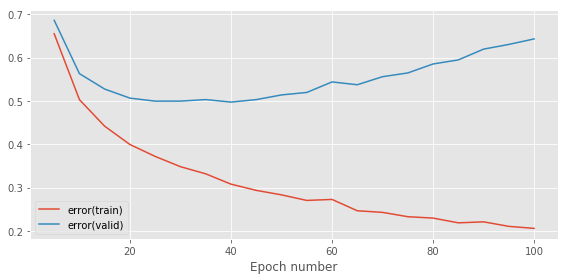

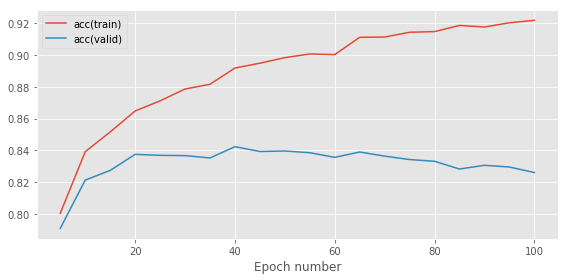

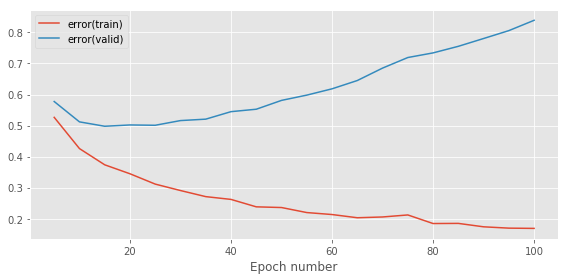

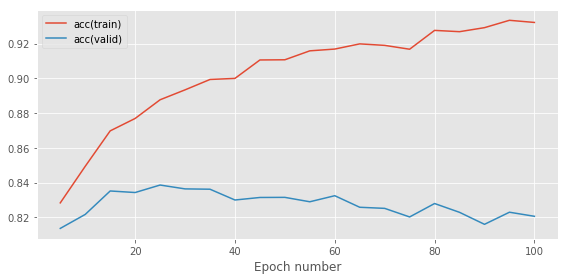

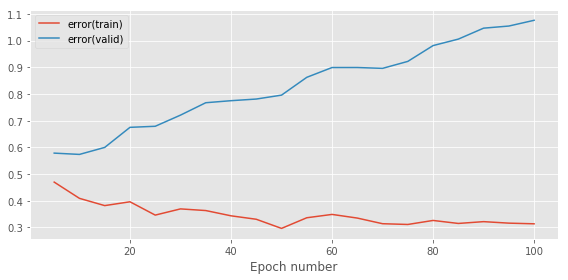

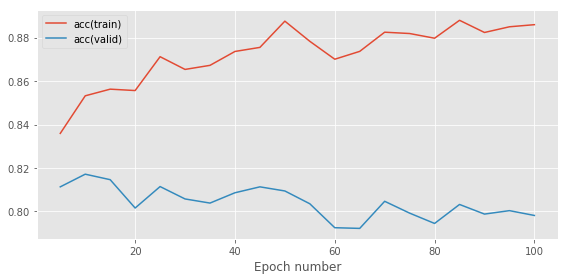

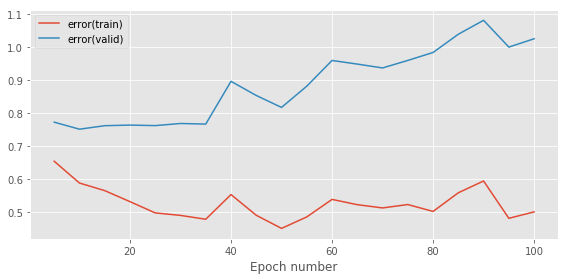

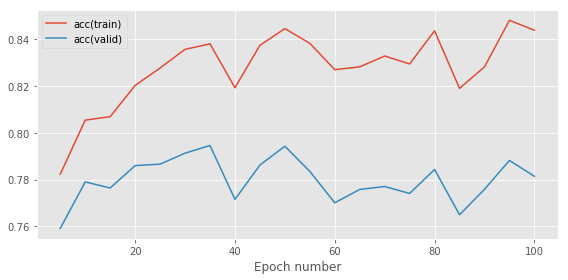

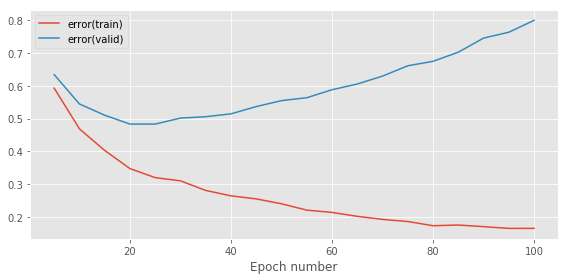

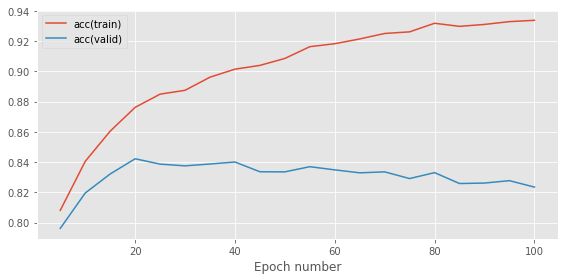

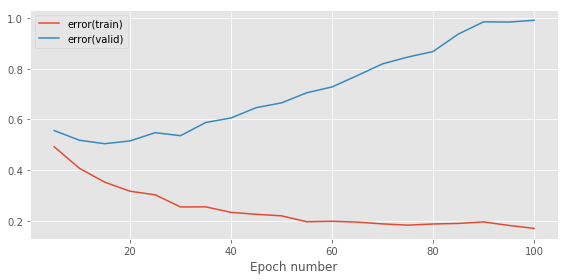

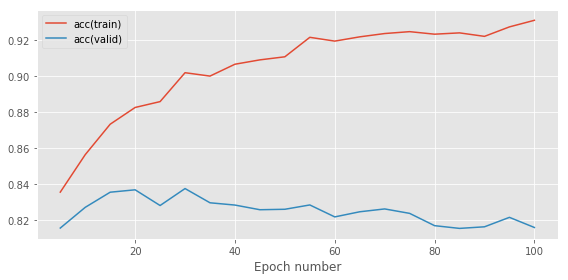

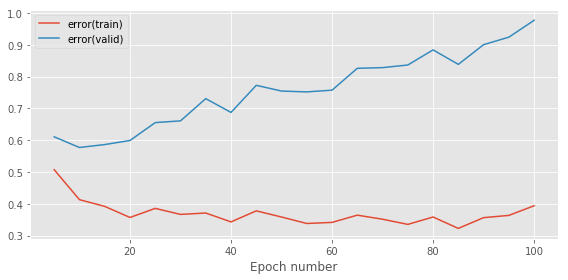

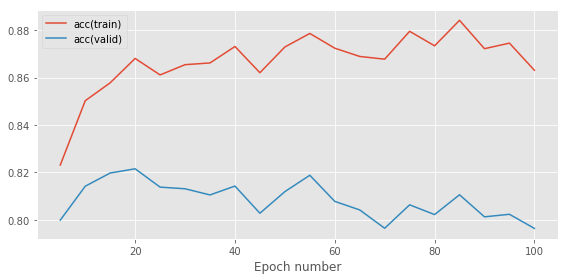

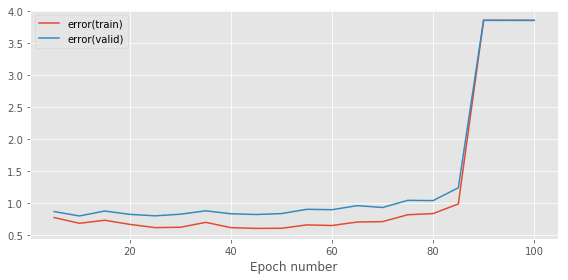

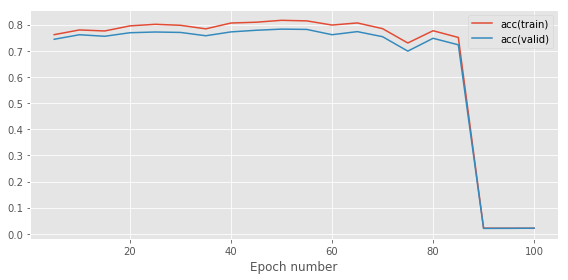

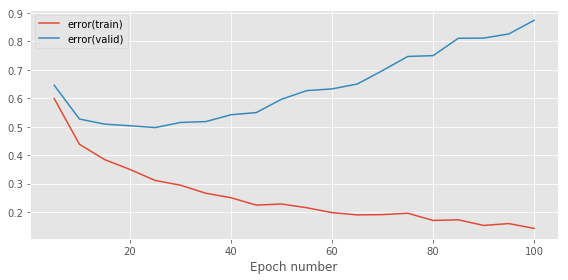

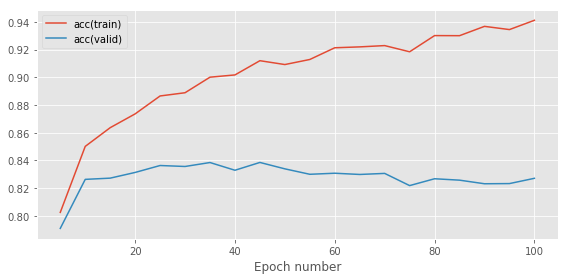

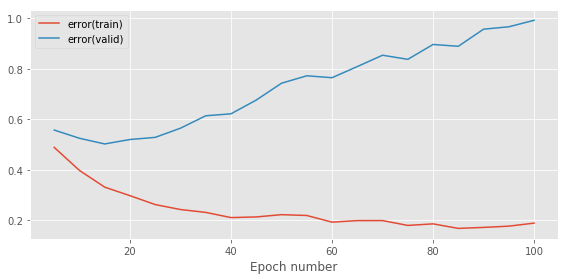

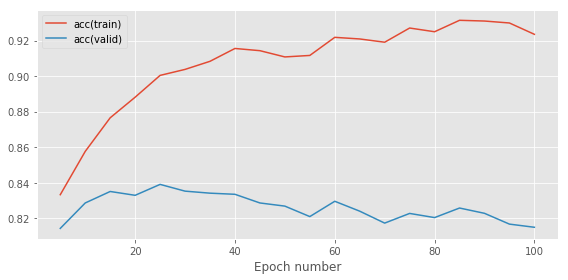

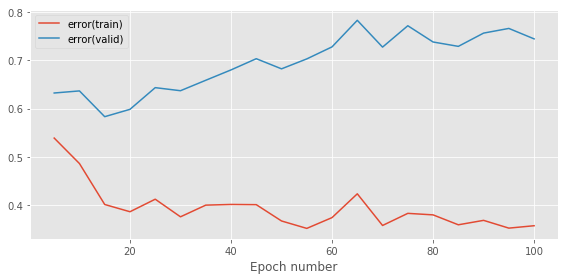

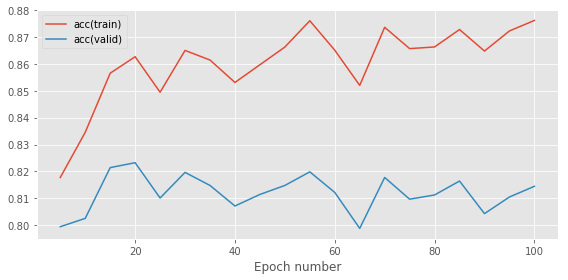

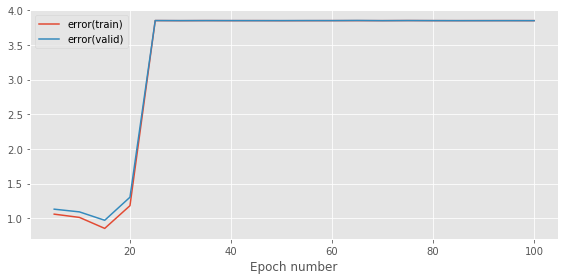

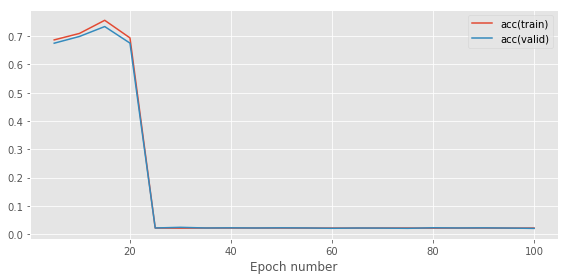

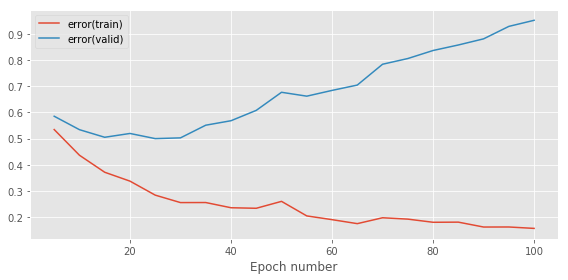

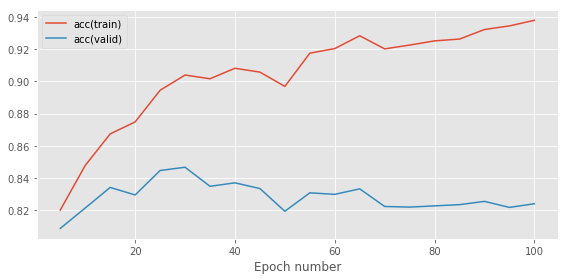

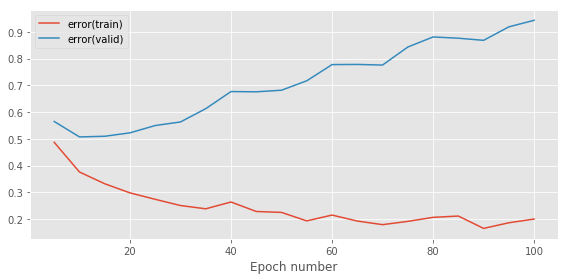

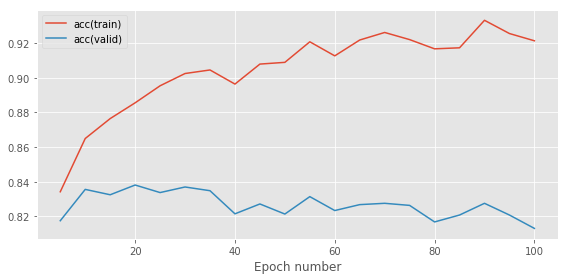

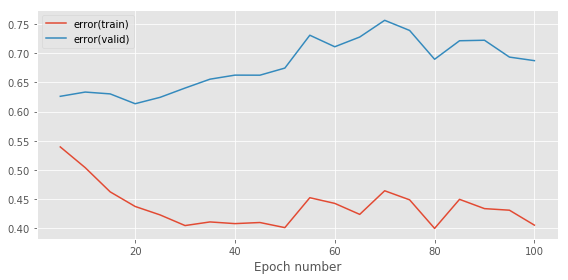

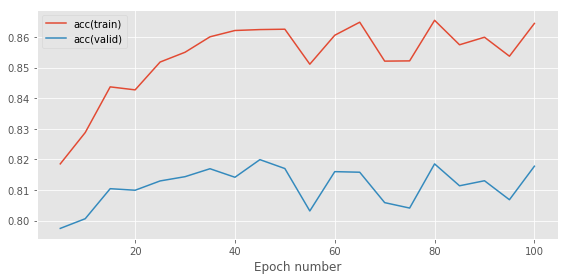

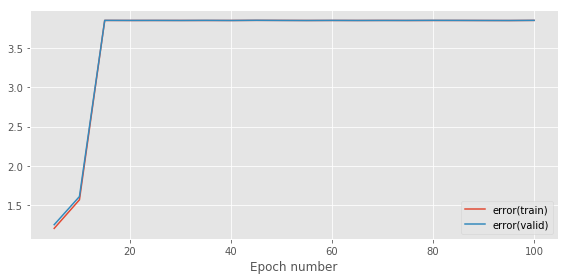

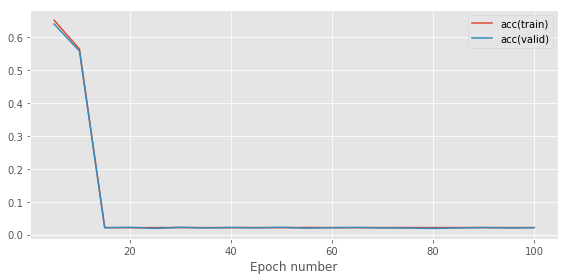

In [17]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rates = [0.05, 0.1, 0.5, 1]
input_dim, output_dim, hidden_dim = 784, 47, 100
stats_interval = 5
num_epochs = 100
n_hidden_layers = range(2, 6)
rule_to_test = GradientDescentLearningRule

for n_hidden_layer in n_hidden_layers:
    for learning_rate in learning_rates:
        title = f"{rule_to_test.__name__} num_epochs={num_epochs}, lr={learning_rate}, n_hidden={n_hidden_layer}"
        print(title)
        weights_init = GlorotUniformInit(rng=rng)
        biases_init = ConstantInit(0.)
        layers = [ # Hidden 1
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            ReluLayer()
        ]
        for _ in range(n_hidden_layer - 1):
            layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)) 
            layers.append(ReluLayer())
        layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init)) # Output
        model = MultipleLayerModel(layers)

        error = CrossEntropySoftmaxError()
        # Use a basic gradient descent learning rule
        learning_rule = rule_to_test(learning_rate=learning_rate)

        #Remember to use notebook=False when you write a script to be run in a terminal
        _ = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title=title)

GradientDescentLearningRule num_epochs=100, lr=0.01, n_hidden=2


Epoch 5: 2.4s to complete
    error(train)=1.15e+00, acc(train)=6.78e-01, error(valid)=1.16e+00, acc(valid)=6.75e-01
Epoch 10: 2.3s to complete
    error(train)=9.26e-01, acc(train)=7.33e-01, error(valid)=9.39e-01, acc(valid)=7.26e-01
Epoch 15: 2.3s to complete
    error(train)=7.93e-01, acc(train)=7.67e-01, error(valid)=8.16e-01, acc(valid)=7.59e-01
Epoch 20: 2.3s to complete
    error(train)=7.08e-01, acc(train)=7.88e-01, error(valid)=7.35e-01, acc(valid)=7.78e-01
Epoch 25: 2.3s to complete
    error(train)=6.46e-01, acc(train)=8.05e-01, error(valid)=6.78e-01, acc(valid)=7.93e-01
Epoch 30: 2.4s to complete
    error(train)=6.02e-01, acc(train)=8.16e-01, error(valid)=6.39e-01, acc(valid)=8.04e-01
Epoch 35: 2.3s to complete
    error(train)=5.71e-01, acc(train)=8.23e-01, error(valid)=6.14e-01, acc(valid)=8.09e-01
Epoch 40: 2.3s to complete
    error(train)=5.45e-01, acc(train)=8.28e-01, error(valid)=5.95e-01, acc(valid)=8.12e-01
Epoch 45: 2.3s to complete
    error(train)=5.14e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.01, n_hidden=2
OrderedDict([('error(test)', 0.54669387363983202), ('acc(test)', 0.82607594936708828)])
GradientDescentLearningRule num_epochs=100, lr=0.01, n_hidden=3


Epoch 5: 2.8s to complete
    error(train)=1.08e+00, acc(train)=6.86e-01, error(valid)=1.10e+00, acc(valid)=6.79e-01
Epoch 10: 2.9s to complete
    error(train)=8.13e-01, acc(train)=7.58e-01, error(valid)=8.33e-01, acc(valid)=7.50e-01
Epoch 15: 2.9s to complete
    error(train)=6.80e-01, acc(train)=7.91e-01, error(valid)=7.05e-01, acc(valid)=7.84e-01
Epoch 20: 2.9s to complete
    error(train)=6.06e-01, acc(train)=8.10e-01, error(valid)=6.40e-01, acc(valid)=8.02e-01
Epoch 25: 2.8s to complete
    error(train)=5.53e-01, acc(train)=8.24e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01
Epoch 30: 2.7s to complete
    error(train)=5.21e-01, acc(train)=8.32e-01, error(valid)=5.71e-01, acc(valid)=8.15e-01
Epoch 35: 3.0s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01
Epoch 40: 2.7s to complete
    error(train)=4.66e-01, acc(train)=8.47e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01
Epoch 45: 2.9s to complete
    error(train)=4.51e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.01, n_hidden=3
OrderedDict([('error(test)', 0.53494795101494197), ('acc(test)', 0.83107594936708828)])
GradientDescentLearningRule num_epochs=100, lr=0.01, n_hidden=4


Epoch 5: 3.0s to complete
    error(train)=1.01e+00, acc(train)=7.00e-01, error(valid)=1.03e+00, acc(valid)=6.96e-01
Epoch 10: 3.0s to complete
    error(train)=7.42e-01, acc(train)=7.72e-01, error(valid)=7.72e-01, acc(valid)=7.61e-01
Epoch 15: 3.0s to complete
    error(train)=6.21e-01, acc(train)=8.04e-01, error(valid)=6.62e-01, acc(valid)=7.92e-01
Epoch 20: 3.4s to complete
    error(train)=5.60e-01, acc(train)=8.21e-01, error(valid)=6.13e-01, acc(valid)=8.07e-01
Epoch 25: 3.2s to complete
    error(train)=5.05e-01, acc(train)=8.36e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01
Epoch 30: 3.3s to complete
    error(train)=4.79e-01, acc(train)=8.41e-01, error(valid)=5.50e-01, acc(valid)=8.21e-01
Epoch 35: 3.2s to complete
    error(train)=4.51e-01, acc(train)=8.49e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01
Epoch 40: 3.0s to complete
    error(train)=4.28e-01, acc(train)=8.56e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01
Epoch 45: 3.0s to complete
    error(train)=4.09e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.01, n_hidden=4
OrderedDict([('error(test)', 0.55297434041447158), ('acc(test)', 0.82917721518987353)])
GradientDescentLearningRule num_epochs=100, lr=0.01, n_hidden=5


Epoch 5: 3.4s to complete
    error(train)=9.65e-01, acc(train)=7.15e-01, error(valid)=9.90e-01, acc(valid)=7.07e-01
Epoch 10: 3.8s to complete
    error(train)=7.06e-01, acc(train)=7.76e-01, error(valid)=7.41e-01, acc(valid)=7.65e-01
Epoch 15: 3.5s to complete
    error(train)=5.89e-01, acc(train)=8.13e-01, error(valid)=6.37e-01, acc(valid)=8.00e-01
Epoch 20: 3.3s to complete
    error(train)=5.28e-01, acc(train)=8.26e-01, error(valid)=5.87e-01, acc(valid)=8.09e-01
Epoch 25: 3.3s to complete
    error(train)=4.86e-01, acc(train)=8.39e-01, error(valid)=5.63e-01, acc(valid)=8.16e-01
Epoch 30: 3.3s to complete
    error(train)=4.46e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01
Epoch 35: 3.4s to complete
    error(train)=4.22e-01, acc(train)=8.58e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01
Epoch 40: 3.3s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01
Epoch 45: 3.5s to complete
    error(train)=3.84e-01, acc


GradientDescentLearningRule num_epochs=100, lr=0.01, n_hidden=5
OrderedDict([('error(test)', 0.58795454905734801), ('acc(test)', 0.8268354430379744)])


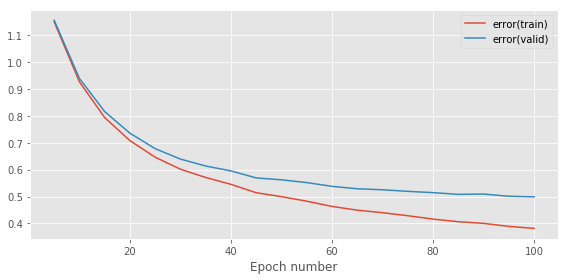

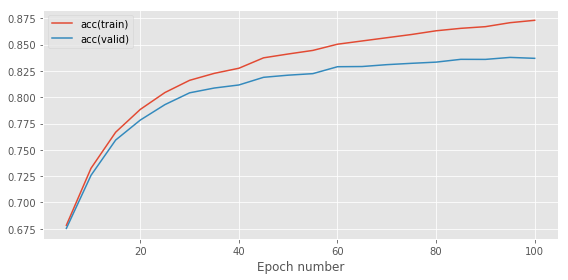

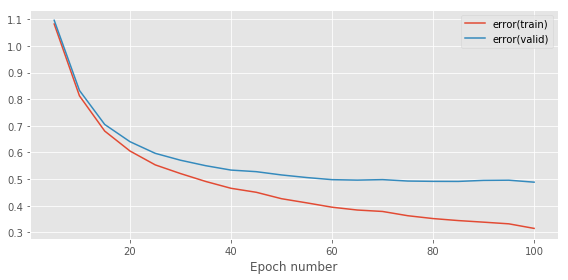

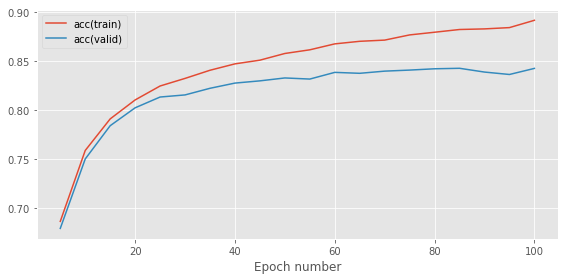

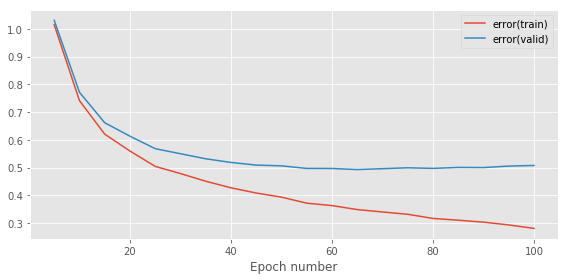

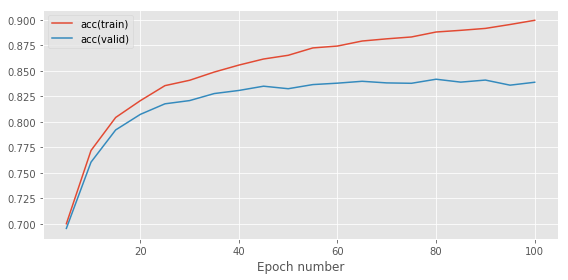

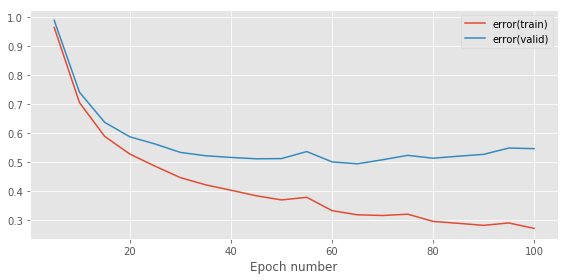

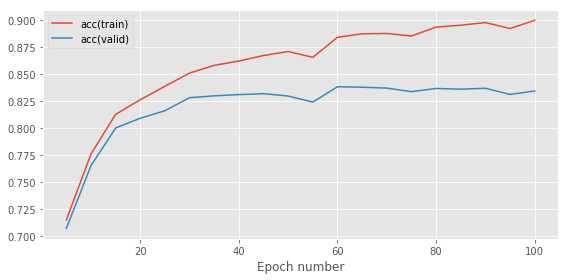

In [18]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rates = [0.01]
input_dim, output_dim, hidden_dim = 784, 47, 100
stats_interval = 5
num_epochs = 100
n_hidden_layers = range(2, 6)
rule_to_test = GradientDescentLearningRule

for n_hidden_layer in n_hidden_layers:
    for learning_rate in learning_rates:
        title = f"{rule_to_test.__name__} num_epochs={num_epochs}, lr={learning_rate}, n_hidden={n_hidden_layer}"
        print(title)
        weights_init = GlorotUniformInit(rng=rng)
        biases_init = ConstantInit(0.)
        layers = [ # Hidden 1
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            ReluLayer()
        ]
        for _ in range(n_hidden_layer - 1):
            layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)) 
            layers.append(ReluLayer())
        layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init)) # Output
        model = MultipleLayerModel(layers)

        error = CrossEntropySoftmaxError()
        # Use a basic gradient descent learning rule
        learning_rule = rule_to_test(learning_rate=learning_rate)

        #Remember to use notebook=False when you write a script to be run in a terminal
        _ = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title=title)

AdamLearningRule num_epochs=50, lr=0.0001, n_hidden=3


Epoch 1: 4.9s to complete
    error(train)=1.26e+00, acc(train)=6.45e-01, error(valid)=1.26e+00, acc(valid)=6.37e-01
Epoch 2: 5.0s to complete
    error(train)=1.08e+00, acc(train)=6.92e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01
Epoch 3: 4.8s to complete
    error(train)=9.79e-01, acc(train)=7.20e-01, error(valid)=9.91e-01, acc(valid)=7.11e-01
Epoch 4: 5.5s to complete
    error(train)=9.04e-01, acc(train)=7.37e-01, error(valid)=9.19e-01, acc(valid)=7.29e-01
Epoch 5: 4.7s to complete
    error(train)=8.48e-01, acc(train)=7.50e-01, error(valid)=8.65e-01, acc(valid)=7.43e-01
Epoch 6: 4.6s to complete
    error(train)=7.96e-01, acc(train)=7.65e-01, error(valid)=8.17e-01, acc(valid)=7.58e-01
Epoch 7: 5.0s to complete
    error(train)=7.57e-01, acc(train)=7.75e-01, error(valid)=7.81e-01, acc(valid)=7.65e-01
Epoch 8: 5.0s to complete
    error(train)=7.27e-01, acc(train)=7.83e-01, error(valid)=7.52e-01, acc(valid)=7.73e-01
Epoch 9: 4.6s to complete
    error(train)=6.98e-01, acc(train)=


AdamLearningRule num_epochs=50, lr=0.0001, n_hidden=3
OrderedDict([('error(test)', 0.54535847183200692), ('acc(test)', 0.82531645569620216)])
AdamLearningRule num_epochs=50, lr=0.0005, n_hidden=3


Epoch 1: 4.8s to complete
    error(train)=7.61e-01, acc(train)=7.69e-01, error(valid)=7.84e-01, acc(valid)=7.60e-01
Epoch 2: 4.7s to complete
    error(train)=6.29e-01, acc(train)=8.04e-01, error(valid)=6.62e-01, acc(valid)=7.93e-01
Epoch 3: 5.0s to complete
    error(train)=5.69e-01, acc(train)=8.18e-01, error(valid)=6.11e-01, acc(valid)=8.04e-01
Epoch 4: 5.1s to complete
    error(train)=5.28e-01, acc(train)=8.28e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01
Epoch 5: 4.9s to complete
    error(train)=4.83e-01, acc(train)=8.40e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01
Epoch 6: 4.9s to complete
    error(train)=4.59e-01, acc(train)=8.46e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01
Epoch 7: 4.9s to complete
    error(train)=4.44e-01, acc(train)=8.51e-01, error(valid)=5.32e-01, acc(valid)=8.23e-01
Epoch 8: 5.0s to complete
    error(train)=4.26e-01, acc(train)=8.55e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01
Epoch 9: 5.0s to complete
    error(train)=3.96e-01, acc(train)=


AdamLearningRule num_epochs=50, lr=0.0005, n_hidden=3
OrderedDict([('error(test)', 0.71284495273007098), ('acc(test)', 0.82075949367088596)])
AdamLearningRule num_epochs=50, lr=0.001, n_hidden=3


Epoch 1: 5.1s to complete
    error(train)=6.67e-01, acc(train)=7.85e-01, error(valid)=6.96e-01, acc(valid)=7.77e-01
Epoch 2: 5.0s to complete
    error(train)=5.30e-01, acc(train)=8.24e-01, error(valid)=5.77e-01, acc(valid)=8.12e-01
Epoch 3: 5.4s to complete
    error(train)=4.84e-01, acc(train)=8.37e-01, error(valid)=5.47e-01, acc(valid)=8.21e-01
Epoch 4: 6.2s to complete
    error(train)=4.62e-01, acc(train)=8.40e-01, error(valid)=5.42e-01, acc(valid)=8.21e-01
Epoch 5: 5.4s to complete
    error(train)=4.27e-01, acc(train)=8.52e-01, error(valid)=5.23e-01, acc(valid)=8.26e-01
Epoch 6: 5.3s to complete
    error(train)=4.12e-01, acc(train)=8.54e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01
Epoch 7: 5.2s to complete
    error(train)=3.82e-01, acc(train)=8.66e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01
Epoch 8: 5.4s to complete
    error(train)=3.55e-01, acc(train)=8.74e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01
Epoch 9: 5.6s to complete
    error(train)=3.59e-01, acc(train)=


AdamLearningRule num_epochs=50, lr=0.001, n_hidden=3
OrderedDict([('error(test)', 0.92594027652631405), ('acc(test)', 0.81708860759493651)])
AdamLearningRule num_epochs=50, lr=0.005, n_hidden=3


Epoch 1: 5.1s to complete
    error(train)=7.33e-01, acc(train)=7.63e-01, error(valid)=7.78e-01, acc(valid)=7.52e-01
Epoch 2: 5.0s to complete
    error(train)=6.32e-01, acc(train)=7.87e-01, error(valid)=7.09e-01, acc(valid)=7.73e-01
Epoch 3: 5.0s to complete
    error(train)=5.93e-01, acc(train)=8.04e-01, error(valid)=6.85e-01, acc(valid)=7.84e-01
Epoch 4: 5.0s to complete
    error(train)=5.68e-01, acc(train)=8.12e-01, error(valid)=6.72e-01, acc(valid)=7.92e-01
Epoch 5: 4.9s to complete
    error(train)=5.70e-01, acc(train)=8.11e-01, error(valid)=6.84e-01, acc(valid)=7.87e-01
Epoch 6: 4.9s to complete
    error(train)=5.50e-01, acc(train)=8.15e-01, error(valid)=6.82e-01, acc(valid)=7.94e-01
Epoch 7: 5.4s to complete
    error(train)=5.27e-01, acc(train)=8.22e-01, error(valid)=6.68e-01, acc(valid)=7.98e-01
Epoch 8: 6.1s to complete
    error(train)=5.18e-01, acc(train)=8.23e-01, error(valid)=6.72e-01, acc(valid)=7.92e-01
Epoch 9: 6.4s to complete
    error(train)=4.94e-01, acc(train)=


AdamLearningRule num_epochs=50, lr=0.005, n_hidden=3
OrderedDict([('error(test)', 0.79826845946250413), ('acc(test)', 0.79734177215189872)])
AdamLearningRule num_epochs=50, lr=0.01, n_hidden=3


Epoch 1: 5.0s to complete
    error(train)=1.06e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.80e-01
Epoch 2: 5.3s to complete
    error(train)=8.93e-01, acc(train)=7.25e-01, error(valid)=9.50e-01, acc(valid)=7.11e-01
Epoch 3: 5.4s to complete
    error(train)=8.32e-01, acc(train)=7.47e-01, error(valid)=8.98e-01, acc(valid)=7.33e-01
Epoch 4: 5.3s to complete
    error(train)=7.98e-01, acc(train)=7.48e-01, error(valid)=8.73e-01, acc(valid)=7.38e-01
Epoch 5: 5.2s to complete
    error(train)=7.91e-01, acc(train)=7.51e-01, error(valid)=8.81e-01, acc(valid)=7.39e-01
Epoch 6: 5.2s to complete
    error(train)=7.80e-01, acc(train)=7.58e-01, error(valid)=8.79e-01, acc(valid)=7.39e-01
Epoch 7: 6.4s to complete
    error(train)=7.77e-01, acc(train)=7.54e-01, error(valid)=8.75e-01, acc(valid)=7.42e-01
Epoch 8: 7.7s to complete
    error(train)=7.48e-01, acc(train)=7.69e-01, error(valid)=8.40e-01, acc(valid)=7.50e-01
Epoch 9: 8.2s to complete
    error(train)=7.09e-01, acc(train)=


AdamLearningRule num_epochs=50, lr=0.01, n_hidden=3
OrderedDict([('error(test)', 0.88755370520893861), ('acc(test)', 0.76905063291139275)])


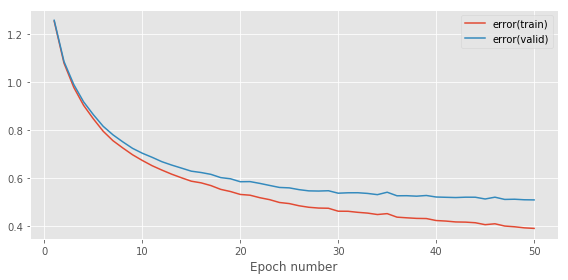

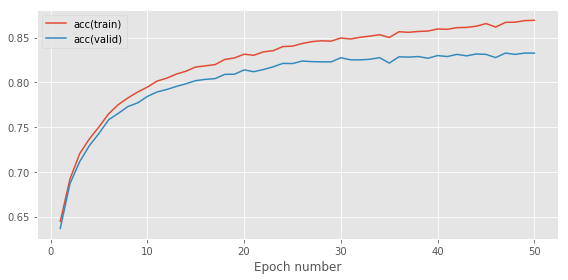

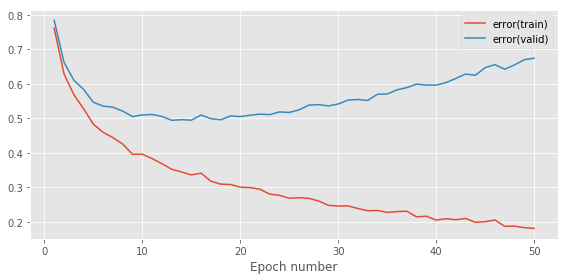

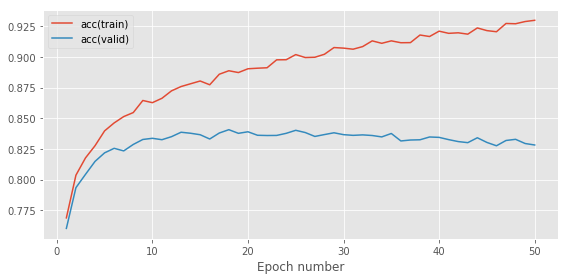

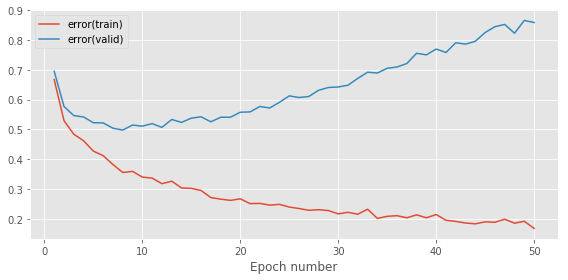

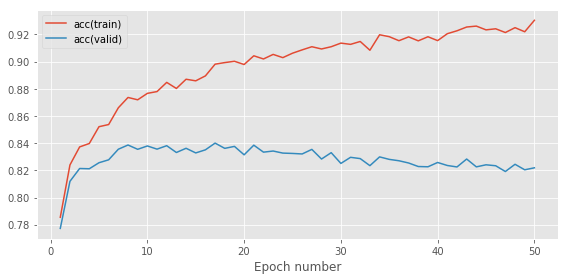

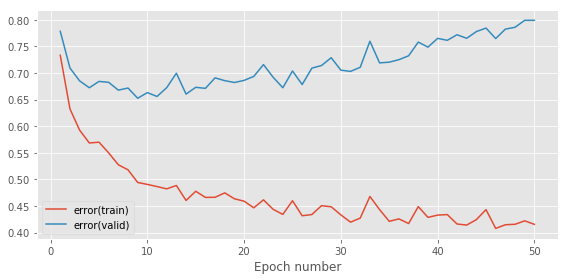

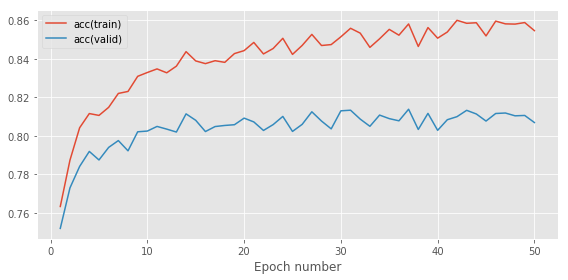

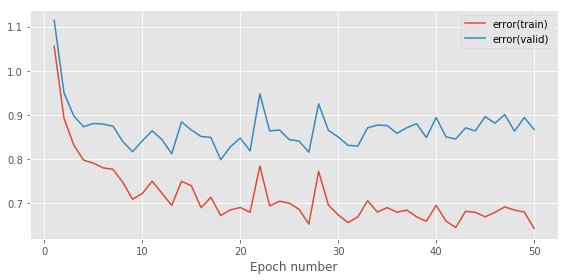

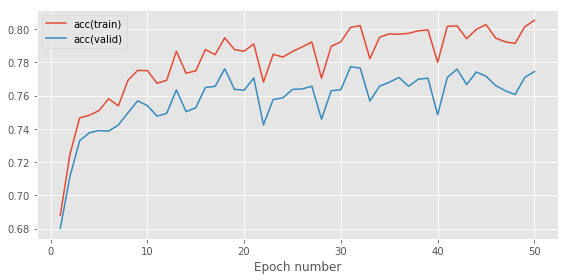

In [20]:
# Adam
from mlp.learning_rules import AdamLearningRule

rule_to_test = AdamLearningRule
n_hidden_layer = 3
stats_interval = 1
num_epochs = 50
learning_rates=[1e-4, 5e-4, 1e-3, 5e-3, 1e-2]

for learning_rate in learning_rates:
    title = f"{rule_to_test.__name__} num_epochs={num_epochs}, lr={learning_rate}, n_hidden={n_hidden_layer}"
    print(title)
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    layers = [ # Hidden 1
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer()
    ]
    for _ in range(n_hidden_layer - 1):
        layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)) 
        layers.append(ReluLayer())
    layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init)) # Output
    model = MultipleLayerModel(layers)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = rule_to_test(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title=title)

AdamLearningRule num_epochs=99, lr=0.0001, n_hidden=3


Epoch 1: 5.3s to complete
    error(train)=1.23e+00, acc(train)=6.50e-01, error(valid)=1.23e+00, acc(valid)=6.50e-01
Epoch 2: 5.0s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01
Epoch 3: 5.7s to complete
    error(train)=9.49e-01, acc(train)=7.25e-01, error(valid)=9.59e-01, acc(valid)=7.21e-01
Epoch 4: 4.9s to complete
    error(train)=8.76e-01, acc(train)=7.42e-01, error(valid)=8.87e-01, acc(valid)=7.39e-01
Epoch 5: 5.0s to complete
    error(train)=8.24e-01, acc(train)=7.56e-01, error(valid)=8.38e-01, acc(valid)=7.53e-01
Epoch 6: 5.2s to complete
    error(train)=7.79e-01, acc(train)=7.67e-01, error(valid)=7.95e-01, acc(valid)=7.64e-01
Epoch 7: 5.4s to complete
    error(train)=7.50e-01, acc(train)=7.74e-01, error(valid)=7.68e-01, acc(valid)=7.73e-01
Epoch 8: 5.2s to complete
    error(train)=7.21e-01, acc(train)=7.81e-01, error(valid)=7.42e-01, acc(valid)=7.76e-01
Epoch 9: 5.1s to complete
    error(train)=6.96e-01, acc(train)=

EARLY STOPPING!

OrderedDict([('error(test)', 0.54860319692622717), ('acc(test)', 0.82715189873417705)])


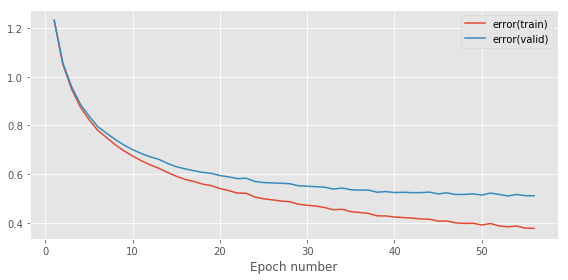

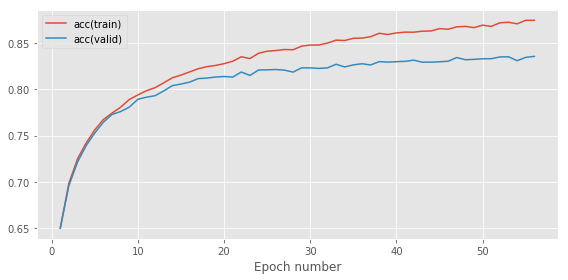

In [31]:
# Adam Test
from mlp.learning_rules import AdamLearningRule

rule_to_test = AdamLearningRule
n_hidden_layer = 3
stats_interval = 1
num_epochs = 99
learning_rates=[1e-4]

for learning_rate in learning_rates:
    title = f"{rule_to_test.__name__} num_epochs={num_epochs}, lr={learning_rate}, n_hidden={n_hidden_layer}"
    print(title)
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    layers = [ # Hidden 1
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer()
    ]
    for _ in range(n_hidden_layer - 1):
        layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)) 
        layers.append(ReluLayer())
    layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init)) # Output
    model = MultipleLayerModel(layers)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = rule_to_test(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title=title, early_stopping=True)

RMSPropLearningRule num_epochs=50, lr=0.0001, n_hidden=3


Epoch 1: 4.4s to complete
    error(train)=1.64e+00, acc(train)=5.56e-01, error(valid)=1.65e+00, acc(valid)=5.52e-01
Epoch 2: 3.6s to complete
    error(train)=1.31e+00, acc(train)=6.35e-01, error(valid)=1.32e+00, acc(valid)=6.30e-01
Epoch 3: 3.6s to complete
    error(train)=1.16e+00, acc(train)=6.73e-01, error(valid)=1.18e+00, acc(valid)=6.67e-01
Epoch 4: 3.6s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.90e-01
Epoch 5: 3.5s to complete
    error(train)=9.89e-01, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01
Epoch 6: 3.6s to complete
    error(train)=9.32e-01, acc(train)=7.31e-01, error(valid)=9.54e-01, acc(valid)=7.23e-01
Epoch 7: 3.6s to complete
    error(train)=8.83e-01, acc(train)=7.41e-01, error(valid)=9.02e-01, acc(valid)=7.34e-01
Epoch 8: 3.7s to complete
    error(train)=8.30e-01, acc(train)=7.57e-01, error(valid)=8.53e-01, acc(valid)=7.49e-01
Epoch 9: 3.7s to complete
    error(train)=8.02e-01, acc(train)=


OrderedDict([('error(test)', 0.57593723300570365), ('acc(test)', 0.81468354430379764)])
RMSPropLearningRule num_epochs=50, lr=0.0005, n_hidden=3


Epoch 1: 4.4s to complete
    error(train)=1.00e+00, acc(train)=7.05e-01, error(valid)=1.02e+00, acc(valid)=7.02e-01
Epoch 2: 4.2s to complete
    error(train)=7.72e-01, acc(train)=7.64e-01, error(valid)=7.91e-01, acc(valid)=7.59e-01
Epoch 3: 4.1s to complete
    error(train)=6.46e-01, acc(train)=7.97e-01, error(valid)=6.79e-01, acc(valid)=7.89e-01
Epoch 4: 3.7s to complete
    error(train)=5.77e-01, acc(train)=8.13e-01, error(valid)=6.21e-01, acc(valid)=7.99e-01
Epoch 5: 4.4s to complete
    error(train)=5.50e-01, acc(train)=8.18e-01, error(valid)=6.07e-01, acc(valid)=8.03e-01
Epoch 6: 5.1s to complete
    error(train)=5.03e-01, acc(train)=8.34e-01, error(valid)=5.72e-01, acc(valid)=8.14e-01
Epoch 7: 4.4s to complete
    error(train)=4.85e-01, acc(train)=8.39e-01, error(valid)=5.60e-01, acc(valid)=8.18e-01
Epoch 8: 3.8s to complete
    error(train)=4.65e-01, acc(train)=8.44e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01
Epoch 9: 3.7s to complete
    error(train)=4.37e-01, acc(train)=


OrderedDict([('error(test)', 0.80800775406283654), ('acc(test)', 0.81297468354430369)])
RMSPropLearningRule num_epochs=50, lr=0.001, n_hidden=3


Epoch 1: 6.1s to complete
    error(train)=7.76e-01, acc(train)=7.59e-01, error(valid)=7.96e-01, acc(valid)=7.55e-01
Epoch 2: 4.6s to complete
    error(train)=6.18e-01, acc(train)=8.01e-01, error(valid)=6.54e-01, acc(valid)=7.91e-01
Epoch 3: 4.8s to complete
    error(train)=5.55e-01, acc(train)=8.15e-01, error(valid)=6.12e-01, acc(valid)=7.99e-01
Epoch 4: 4.5s to complete
    error(train)=4.88e-01, acc(train)=8.34e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01
Epoch 5: 4.5s to complete
    error(train)=4.54e-01, acc(train)=8.45e-01, error(valid)=5.48e-01, acc(valid)=8.22e-01
Epoch 6: 4.4s to complete
    error(train)=4.34e-01, acc(train)=8.49e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01
Epoch 7: 4.4s to complete
    error(train)=4.14e-01, acc(train)=8.54e-01, error(valid)=5.39e-01, acc(valid)=8.22e-01
Epoch 8: 5.4s to complete
    error(train)=3.82e-01, acc(train)=8.66e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01
Epoch 9: 5.7s to complete
    error(train)=3.70e-01, acc(train)=


OrderedDict([('error(test)', 1.1844774524815376), ('acc(test)', 0.80170886075949321)])
RMSPropLearningRule num_epochs=50, lr=0.005, n_hidden=3


Epoch 1: 4.4s to complete
    error(train)=7.43e-01, acc(train)=7.60e-01, error(valid)=7.93e-01, acc(valid)=7.54e-01
Epoch 2: 3.8s to complete
    error(train)=8.05e-01, acc(train)=7.43e-01, error(valid)=8.84e-01, acc(valid)=7.31e-01
Epoch 3: 3.6s to complete
    error(train)=7.60e-01, acc(train)=7.72e-01, error(valid)=8.55e-01, acc(valid)=7.58e-01
Epoch 4: 3.6s to complete
    error(train)=8.03e-01, acc(train)=7.56e-01, error(valid)=9.00e-01, acc(valid)=7.43e-01
Epoch 5: 3.7s to complete
    error(train)=9.21e-01, acc(train)=7.29e-01, error(valid)=1.04e+00, acc(valid)=7.16e-01
Epoch 6: 4.6s to complete
    error(train)=8.98e-01, acc(train)=7.49e-01, error(valid)=1.03e+00, acc(valid)=7.38e-01
Epoch 7: 4.9s to complete
    error(train)=9.95e-01, acc(train)=7.45e-01, error(valid)=1.18e+00, acc(valid)=7.31e-01
Epoch 8: 5.0s to complete
    error(train)=1.03e+00, acc(train)=7.40e-01, error(valid)=1.24e+00, acc(valid)=7.26e-01
Epoch 9: 6.2s to complete
    error(train)=1.14e+00, acc(train)=


OrderedDict([('error(test)', 4.076517970283053), ('acc(test)', 0.048481012658227796)])
RMSPropLearningRule num_epochs=50, lr=0.01, n_hidden=3


Epoch 1: 4.5s to complete
    error(train)=1.06e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.69e-01
Epoch 2: 3.9s to complete
    error(train)=1.18e+00, acc(train)=6.79e-01, error(valid)=1.27e+00, acc(valid)=6.71e-01
Epoch 3: 4.1s to complete
    error(train)=1.28e+00, acc(train)=6.51e-01, error(valid)=1.38e+00, acc(valid)=6.34e-01
Epoch 4: 3.9s to complete
    error(train)=1.50e+00, acc(train)=6.00e-01, error(valid)=1.63e+00, acc(valid)=5.88e-01
Epoch 5: 3.7s to complete
    error(train)=2.21e+00, acc(train)=5.91e-01, error(valid)=2.49e+00, acc(valid)=5.80e-01
Epoch 6: 3.6s to complete
    error(train)=2.22e+00, acc(train)=4.54e-01, error(valid)=2.39e+00, acc(valid)=4.49e-01
Epoch 7: 4.6s to complete
    error(train)=2.68e+00, acc(train)=3.27e-01, error(valid)=2.95e+00, acc(valid)=3.24e-01
Epoch 8: 5.7s to complete
    error(train)=3.41e+00, acc(train)=1.43e-01, error(valid)=3.49e+00, acc(valid)=1.38e-01
Epoch 9: 6.7s to complete
    error(train)=3.70e+00, acc(train)=


OrderedDict([('error(test)', 3.8416980092279909), ('acc(test)', 0.036708860759493617)])


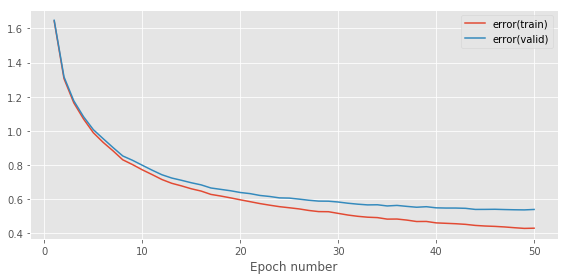

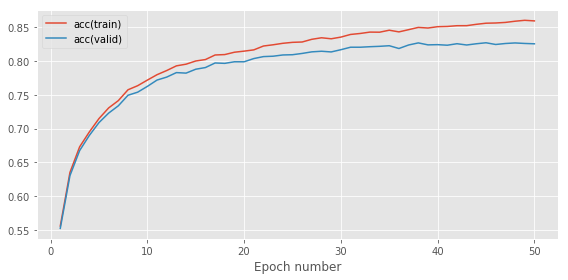

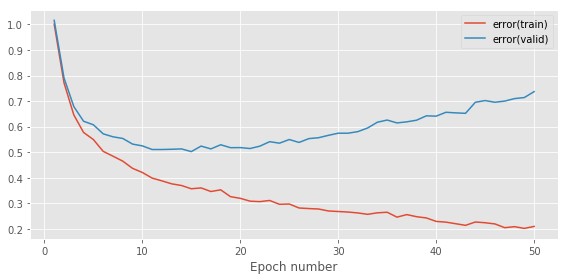

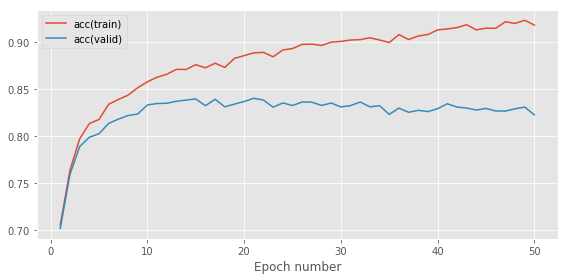

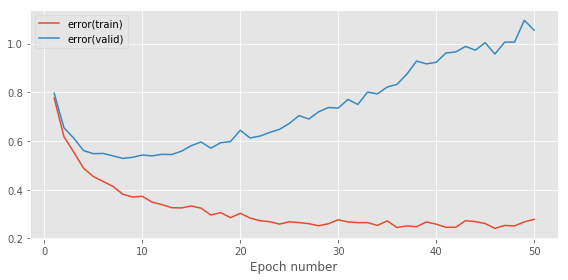

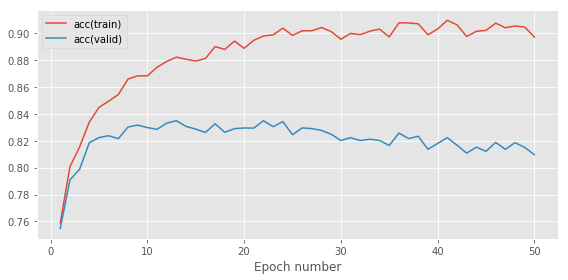

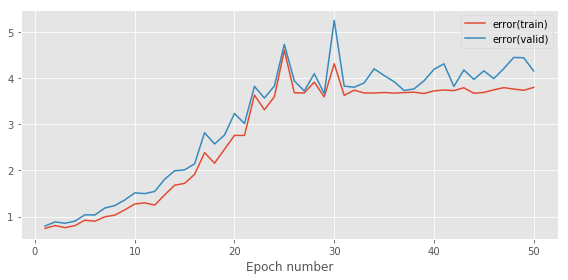

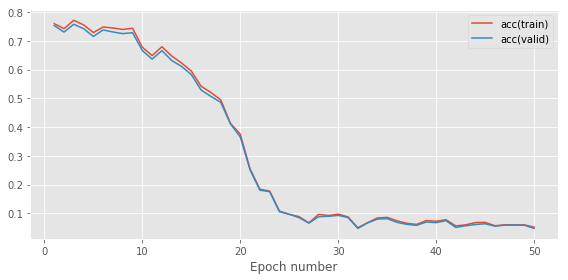

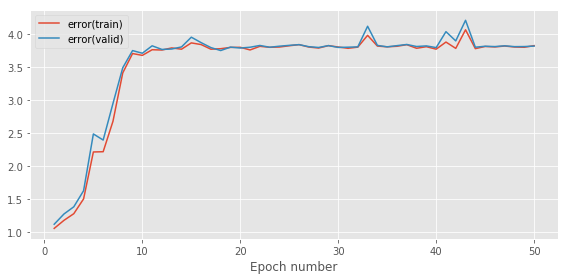

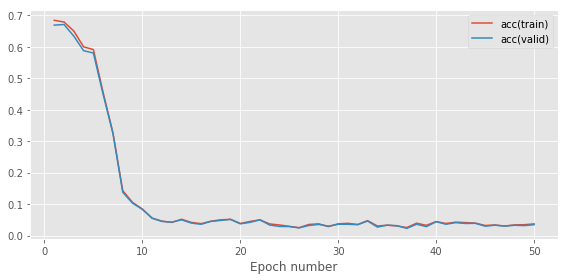

In [26]:
# RMSProp
from mlp.learning_rules import RMSPropLearningRule

rule_to_test = RMSPropLearningRule
n_hidden_layer = 3
stats_interval = 1
num_epochs = 50
learning_rates=[1e-4, 5e-4, 1e-3, 5e-3, 1e-2]

for learning_rate in learning_rates:
    title = f"{rule_to_test.__name__} num_epochs={num_epochs}, lr={learning_rate}, n_hidden={n_hidden_layer}"
    print(title)
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    layers = [ # Hidden 1
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer()
    ]
    for _ in range(n_hidden_layer - 1):
        layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)) 
        layers.append(ReluLayer())
    layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init)) # Output
    model = MultipleLayerModel(layers)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = rule_to_test(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title=title)

RMSPropLearningRule num_epochs=99, lr=0.0001, n_hidden=3


Epoch 1: 4.1s to complete
    error(train)=1.60e+00, acc(train)=5.71e-01, error(valid)=1.59e+00, acc(valid)=5.67e-01
Epoch 2: 4.3s to complete
    error(train)=1.24e+00, acc(train)=6.52e-01, error(valid)=1.25e+00, acc(valid)=6.46e-01
Epoch 3: 4.2s to complete
    error(train)=1.09e+00, acc(train)=6.89e-01, error(valid)=1.10e+00, acc(valid)=6.85e-01
Epoch 4: 4.2s to complete
    error(train)=9.96e-01, acc(train)=7.13e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01
Epoch 5: 3.9s to complete
    error(train)=9.24e-01, acc(train)=7.31e-01, error(valid)=9.42e-01, acc(valid)=7.24e-01
Epoch 6: 4.4s to complete
    error(train)=8.66e-01, acc(train)=7.45e-01, error(valid)=8.84e-01, acc(valid)=7.38e-01
Epoch 7: 4.9s to complete
    error(train)=8.20e-01, acc(train)=7.57e-01, error(valid)=8.41e-01, acc(valid)=7.50e-01
Epoch 8: 4.0s to complete
    error(train)=7.84e-01, acc(train)=7.65e-01, error(valid)=8.06e-01, acc(valid)=7.57e-01
Epoch 9: 4.5s to complete
    error(train)=7.53e-01, acc(train)=

EARLY STOPPING!

OrderedDict([('error(test)', 0.56785051021202348), ('acc(test)', 0.81974683544303772)])


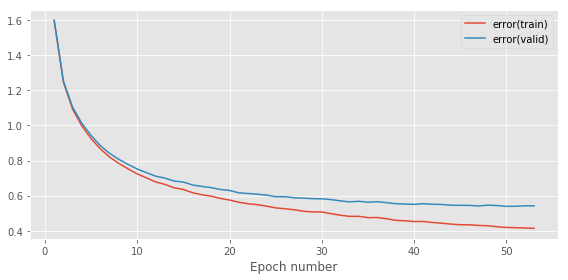

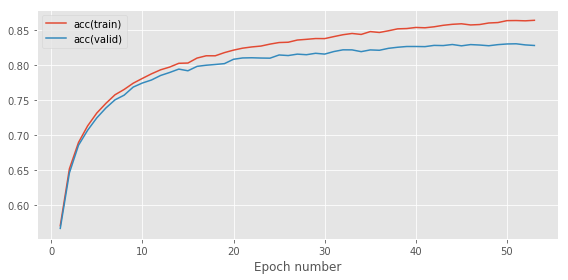

In [30]:
# Adam Test
from mlp.learning_rules import RMSPropLearningRule

rule_to_test = RMSPropLearningRule
n_hidden_layer = 3
stats_interval = 1
num_epochs = 99
learning_rates=[1e-4]

for learning_rate in learning_rates:
    title = f"{rule_to_test.__name__} num_epochs={num_epochs}, lr={learning_rate}, n_hidden={n_hidden_layer}"
    print(title)
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    layers = [ # Hidden 1
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer()
    ]
    for _ in range(n_hidden_layer - 1):
        layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)) 
        layers.append(ReluLayer())
    layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init)) # Output
    model = MultipleLayerModel(layers)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = rule_to_test(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title=title, early_stopping=True)

AdamLearningRule num_epochs=100, lr=0.0003, n_hidden=3


Epoch 1: 5.0s to complete
    error(train)=8.77e-01, acc(train)=7.40e-01, error(valid)=8.92e-01, acc(valid)=7.36e-01
Epoch 2: 4.6s to complete
    error(train)=7.38e-01, acc(train)=7.74e-01, error(valid)=7.64e-01, acc(valid)=7.68e-01
Epoch 3: 4.6s to complete
    error(train)=6.64e-01, acc(train)=7.94e-01, error(valid)=6.95e-01, acc(valid)=7.85e-01
Epoch 4: 4.8s to complete
    error(train)=6.11e-01, acc(train)=8.07e-01, error(valid)=6.51e-01, acc(valid)=7.95e-01
Epoch 5: 4.6s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=6.15e-01, acc(valid)=8.06e-01
Epoch 6: 4.5s to complete
    error(train)=5.39e-01, acc(train)=8.28e-01, error(valid)=5.90e-01, acc(valid)=8.12e-01
Epoch 7: 4.5s to complete
    error(train)=5.21e-01, acc(train)=8.33e-01, error(valid)=5.79e-01, acc(valid)=8.14e-01
Epoch 8: 4.7s to complete
    error(train)=5.04e-01, acc(train)=8.34e-01, error(valid)=5.67e-01, acc(valid)=8.15e-01
Epoch 9: 4.6s to complete
    error(train)=4.84e-01, acc(train)=

EARLY STOPPING!

OrderedDict([('error(test)', 0.53847219139816171), ('acc(test)', 0.82886075949367055)])


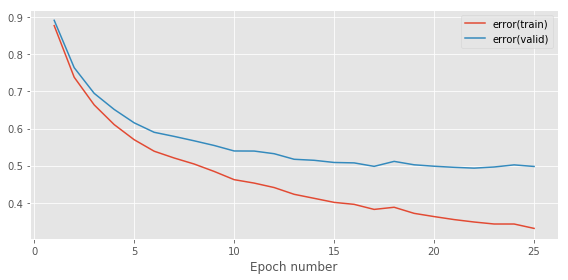

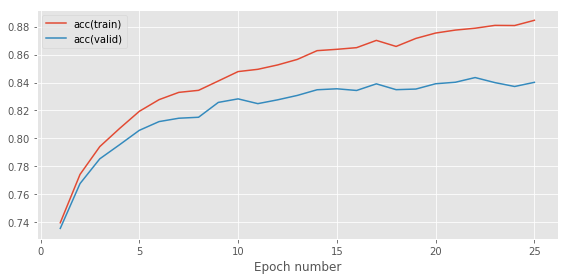

In [32]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import ScheduledOptimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts


# Adam Test
from mlp.learning_rules import AdamLearningRule

rule_to_test = AdamLearningRule
n_hidden_layer = 3
stats_interval = 1
num_epochs = 100
learning_rates=[3e-4]

for learning_rate in learning_rates:
    scheduler = CosineAnnealingWithWarmRestarts(0, learning_rate, 999, 0.9, 3)
    title = f"{rule_to_test.__name__} num_epochs={num_epochs}, lr={learning_rate}, n_hidden={n_hidden_layer}"
    print(title)
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    layers = [ # Hidden 1
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer()
    ]
    for _ in range(n_hidden_layer - 1):
        layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)) 
        layers.append(ReluLayer())
    layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init)) # Output
    model = MultipleLayerModel(layers)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = rule_to_test(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title=title, early_stopping=False)

AdamLearningRule norestart num_epochs=100, lr=0.0005, n_hidden=3


Epoch 1: 4.8s to complete
    error(train)=7.60e-01, acc(train)=7.69e-01, error(valid)=7.89e-01, acc(valid)=7.65e-01
Epoch 2: 4.7s to complete
    error(train)=6.28e-01, acc(train)=7.99e-01, error(valid)=6.69e-01, acc(valid)=7.88e-01
Epoch 3: 4.8s to complete
    error(train)=5.50e-01, acc(train)=8.23e-01, error(valid)=6.00e-01, acc(valid)=8.11e-01
Epoch 4: 4.8s to complete
    error(train)=5.03e-01, acc(train)=8.37e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01
Epoch 5: 5.0s to complete
    error(train)=4.84e-01, acc(train)=8.35e-01, error(valid)=5.55e-01, acc(valid)=8.18e-01
Epoch 6: 4.7s to complete
    error(train)=4.52e-01, acc(train)=8.49e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01
Epoch 7: 4.9s to complete
    error(train)=4.31e-01, acc(train)=8.55e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01
Epoch 8: 4.9s to complete
    error(train)=4.20e-01, acc(train)=8.58e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01
Epoch 9: 5.0s to complete
    error(train)=4.01e-01, acc(train)=

EARLY STOPPING!

OrderedDict([('error(test)', 0.54414767729685309), ('acc(test)', 0.8294936708860754)])


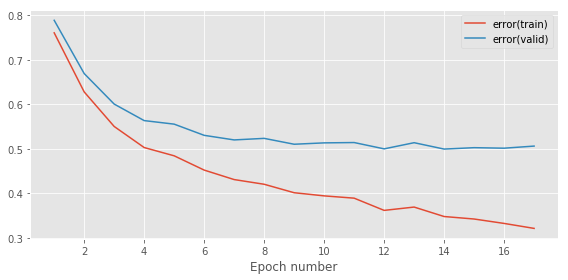

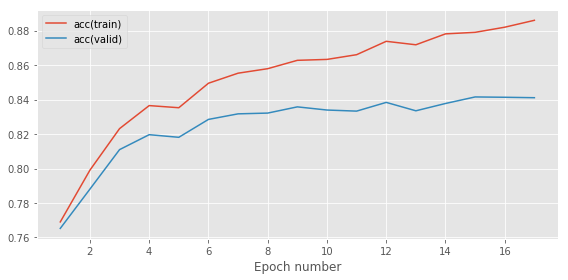

In [56]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import ScheduledOptimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts


# Adam Test
from mlp.learning_rules import AdamLearningRule

rule_to_test = AdamLearningRule
n_hidden_layer = 3
stats_interval = 1
num_epochs = 100
learning_rates=[5e-4]

for learning_rate in learning_rates:
    scheduler = CosineAnnealingWithWarmRestarts(0, learning_rate, 999, 0.9, 3)
    title = f"{rule_to_test.__name__} norestart num_epochs={num_epochs}, lr={learning_rate}, n_hidden={n_hidden_layer}"
    print(title)
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    layers = [ # Hidden 1
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer()
    ]
    for _ in range(n_hidden_layer - 1):
        layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)) 
        layers.append(ReluLayer())
    layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init)) # Output
    model = MultipleLayerModel(layers)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = rule_to_test(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats2(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title=title, early_stopping=True)

GradientDescentLearningRule norestart num_epochs=100, lr=0.05, n_hidden=3


Epoch 1: 2.9s to complete
    error(train)=1.15e+00, acc(train)=6.65e-01, error(valid)=1.16e+00, acc(valid)=6.54e-01
Epoch 2: 2.9s to complete
    error(train)=8.77e-01, acc(train)=7.31e-01, error(valid)=8.95e-01, acc(valid)=7.26e-01
Epoch 3: 2.9s to complete
    error(train)=7.24e-01, acc(train)=7.71e-01, error(valid)=7.42e-01, acc(valid)=7.64e-01
Epoch 4: 2.9s to complete
    error(train)=6.55e-01, acc(train)=7.92e-01, error(valid)=6.82e-01, acc(valid)=7.84e-01
Epoch 5: 3.4s to complete
    error(train)=5.92e-01, acc(train)=8.08e-01, error(valid)=6.24e-01, acc(valid)=7.98e-01
Epoch 6: 2.8s to complete
    error(train)=5.37e-01, acc(train)=8.27e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01
Epoch 7: 2.8s to complete
    error(train)=5.34e-01, acc(train)=8.25e-01, error(valid)=5.81e-01, acc(valid)=8.09e-01
Epoch 8: 3.6s to complete
    error(train)=4.97e-01, acc(train)=8.36e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01
Epoch 9: 3.7s to complete
    error(train)=4.82e-01, acc(train)=

EARLY STOPPING!

OrderedDict([('error(test)', 0.51960539705053721), ('acc(test)', 0.83240506329113872)])


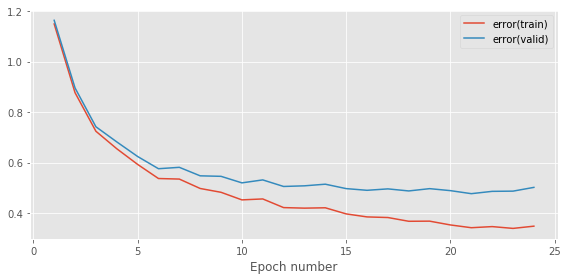

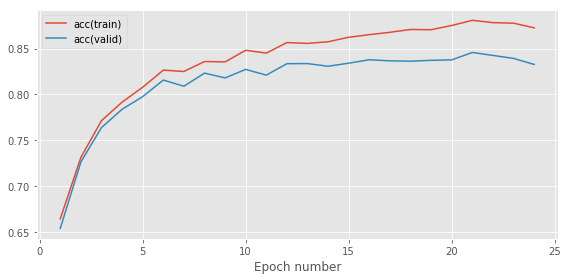

In [55]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import ScheduledOptimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts, ConstantLearningRateScheduler


# Adam Test
from mlp.learning_rules import AdamLearningRule

rule_to_test = GradientDescentLearningRule
n_hidden_layer = 3
stats_interval = 1
num_epochs = 100
learning_rates=[0.05]

for learning_rate in learning_rates:
    scheduler = CosineAnnealingWithWarmRestarts(0, learning_rate, 999, 0.9, 3)
    title = f"{rule_to_test.__name__} norestart num_epochs={num_epochs}, lr={learning_rate}, n_hidden={n_hidden_layer}"
    print(title)
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    layers = [ # Hidden 1
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer()
    ]
    for _ in range(n_hidden_layer - 1):
        layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)) 
        layers.append(ReluLayer())
    layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init)) # Output
    model = MultipleLayerModel(layers)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = rule_to_test(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats2(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title=title, early_stopping=True)

AdamLearningRule ConstantLearningRateScheduler L2Penalty num_epochs=100, lr=0.0003, n_hidden=3


Epoch 1: 5.0s to complete
    error(train)=8.92e-01, acc(train)=7.38e-01, error(valid)=9.05e-01, acc(valid)=7.35e-01
Epoch 2: 5.2s to complete
    error(train)=7.44e-01, acc(train)=7.77e-01, error(valid)=7.63e-01, acc(valid)=7.71e-01
Epoch 3: 5.3s to complete
    error(train)=6.86e-01, acc(train)=7.90e-01, error(valid)=7.07e-01, acc(valid)=7.82e-01
Epoch 4: 5.8s to complete
    error(train)=6.34e-01, acc(train)=8.03e-01, error(valid)=6.63e-01, acc(valid)=7.90e-01
Epoch 5: 5.1s to complete
    error(train)=6.05e-01, acc(train)=8.10e-01, error(valid)=6.38e-01, acc(valid)=7.97e-01
Epoch 6: 5.2s to complete
    error(train)=5.79e-01, acc(train)=8.18e-01, error(valid)=6.18e-01, acc(valid)=8.05e-01
Epoch 7: 5.5s to complete
    error(train)=5.48e-01, acc(train)=8.26e-01, error(valid)=5.88e-01, acc(valid)=8.11e-01
Epoch 8: 5.1s to complete
    error(train)=5.30e-01, acc(train)=8.31e-01, error(valid)=5.73e-01, acc(valid)=8.15e-01
Epoch 9: 5.2s to complete
    error(train)=5.22e-01, acc(train)=

EARLY STOPPING!

OrderedDict([('error(test)', 0.49645870588609331), ('acc(test)', 0.83569620253164512)])
AdamLearningRule CosineAnnealingWithNoRestarts L2Penalty num_epochs=100, lr=0.0003, n_hidden=3


Epoch 1: 5.0s to complete
    error(train)=9.16e-01, acc(train)=7.31e-01, error(valid)=9.32e-01, acc(valid)=7.28e-01
Epoch 2: 4.8s to complete
    error(train)=7.63e-01, acc(train)=7.71e-01, error(valid)=7.88e-01, acc(valid)=7.64e-01
Epoch 3: 4.8s to complete
    error(train)=6.95e-01, acc(train)=7.88e-01, error(valid)=7.23e-01, acc(valid)=7.79e-01
Epoch 4: 5.3s to complete
    error(train)=6.54e-01, acc(train)=7.97e-01, error(valid)=6.81e-01, acc(valid)=7.89e-01
Epoch 5: 4.9s to complete
    error(train)=6.19e-01, acc(train)=8.07e-01, error(valid)=6.49e-01, acc(valid)=7.96e-01
Epoch 6: 4.9s to complete
    error(train)=5.89e-01, acc(train)=8.15e-01, error(valid)=6.21e-01, acc(valid)=8.02e-01
Epoch 7: 5.3s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=6.00e-01, acc(valid)=8.10e-01
Epoch 8: 5.4s to complete
    error(train)=5.51e-01, acc(train)=8.25e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01
Epoch 9: 4.8s to complete
    error(train)=5.45e-01, acc(train)=

EARLY STOPPING!

OrderedDict([('error(test)', 0.50084558312075234), ('acc(test)', 0.83601265822784776)])
AdamLearningRule CosineAnnealingWithWarmRestarts L2Penalty num_epochs=100, lr=0.0003, n_hidden=3


Epoch 1: 5.8s to complete
    error(train)=9.16e-01, acc(train)=7.28e-01, error(valid)=9.30e-01, acc(valid)=7.23e-01
Epoch 2: 5.6s to complete
    error(train)=7.62e-01, acc(train)=7.70e-01, error(valid)=7.81e-01, acc(valid)=7.62e-01
Epoch 3: 5.5s to complete
    error(train)=6.82e-01, acc(train)=7.92e-01, error(valid)=7.03e-01, acc(valid)=7.82e-01
Epoch 4: 5.6s to complete
    error(train)=6.43e-01, acc(train)=8.01e-01, error(valid)=6.68e-01, acc(valid)=7.92e-01
Epoch 5: 6.6s to complete
    error(train)=6.18e-01, acc(train)=8.09e-01, error(valid)=6.42e-01, acc(valid)=7.98e-01
Epoch 6: 6.5s to complete
    error(train)=6.03e-01, acc(train)=8.13e-01, error(valid)=6.32e-01, acc(valid)=8.02e-01
Epoch 7: 6.0s to complete
    error(train)=5.88e-01, acc(train)=8.18e-01, error(valid)=6.17e-01, acc(valid)=8.06e-01
Epoch 8: 6.0s to complete
    error(train)=5.82e-01, acc(train)=8.19e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01
Epoch 9: 6.7s to complete
    error(train)=5.80e-01, acc(train)=

EARLY STOPPING!

OrderedDict([('error(test)', 0.5557367400932246), ('acc(test)', 0.81955696202531614)])


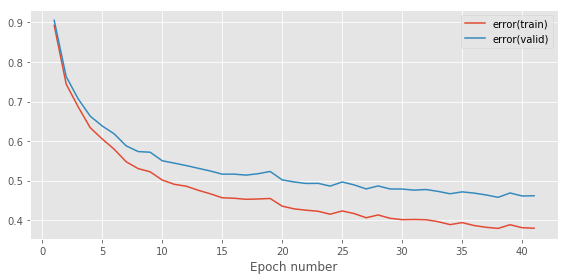

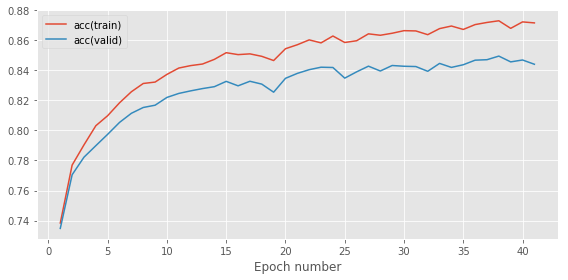

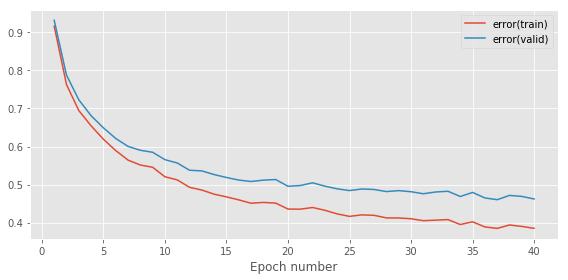

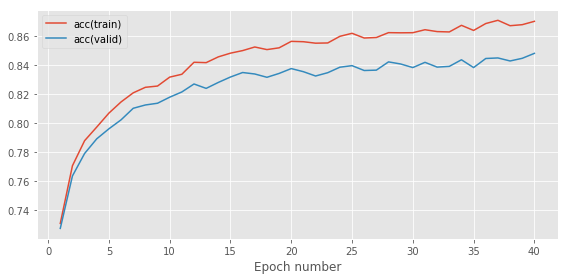

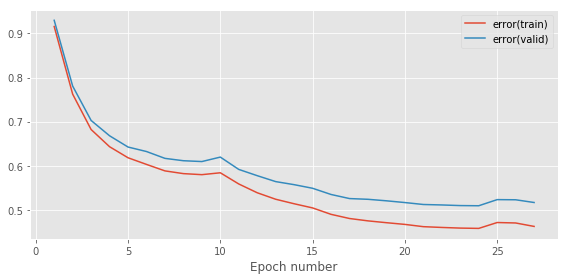

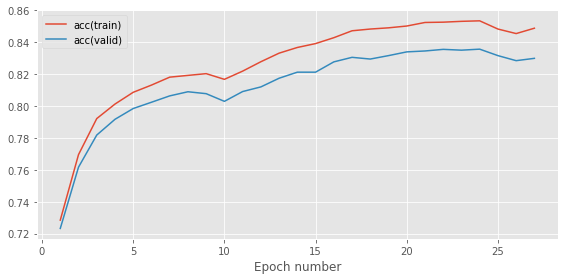

In [60]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRuleWithWeightDecay
from mlp.optimisers import ScheduledOptimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts
from mlp.penalties import L2Penalty



# Adam Test
from mlp.learning_rules import AdamLearningRule

class CosineAnnealingWithNoRestarts(CosineAnnealingWithWarmRestarts):
    pass

rule_to_test = AdamLearningRule
n_hidden_layer = 3
stats_interval = 1
num_epochs = 100
learning_rates=[3e-4]
for learning_rate in learning_rates:
    schedulers = [ConstantLearningRateScheduler(learning_rate), CosineAnnealingWithNoRestarts(0, learning_rate, 999, 0.9, 3), CosineAnnealingWithWarmRestarts(0, learning_rate, 10, 0.9, 1.5)]
    #(None, AdamLearningRuleWithWeightDecay(learning_rate=learning_rate)),
    penalties_rules = [ (L2Penalty(0.001), AdamLearningRule(learning_rate=learning_rate))]
    for penalty, rule_to_test in penalties_rules:
        for scheduler in schedulers:
            title = f"{rule_to_test.__class__.__name__} {scheduler.__class__.__name__} {penalty.__class__.__name__} num_epochs={num_epochs}, lr={learning_rate}, n_hidden={n_hidden_layer}"
            print(title)
            weights_init = GlorotUniformInit(rng=rng)
            biases_init = ConstantInit(0.)
            layers = [ # Hidden 1
                AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty=penalty), 
                ReluLayer()
            ]
            for _ in range(n_hidden_layer - 1):
                layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=penalty)) 
                layers.append(ReluLayer())
            layers.append(AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty=penalty)) # Output
            model = MultipleLayerModel(layers)

            error = CrossEntropySoftmaxError()
            # Use a basic gradient descent learning rule
            learning_rule = rule_to_test

            #Remember to use notebook=False when you write a script to be run in a terminal
            _ = train_model_and_plot_stats2(
                scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, title=title, early_stopping=True)